# TFLite on Python
## Import modules


In [3]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'tensorflow'

In [4]:
interpreter = tf.lite.Interpreter("./contours.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
input_details

NameError: name 'tf' is not defined

In [3]:
output_details

[{'name': 'conv2d_27',
  'index': 213,
  'shape': array([  1,   1,   1, 266], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0)},
 {'name': 'conv2d_31',
  'index': 210,
  'shape': array([1, 1, 1, 1], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0)}]

(192, 192, 3)

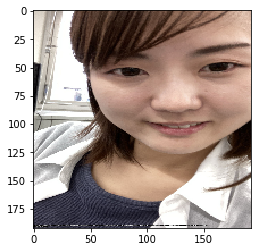

In [7]:
img = cv2.imread("iOS_hirame.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
w,h,_ = img.shape
c_w = int(w / 10)
c_h = int(h / 10)
img = img[:, c_h: h - c_h]
size = 192
img = cv2.resize(img, (size, size))
plt.imshow(img)
# red, green, blue = input_img.split()
img = img.astype(np.float32)
img = img / 256.0
img.shape


In [8]:
input_img = img[np.newaxis, :, :, :]
input_img.shape

(1, 192, 192, 3)

In [17]:
import time
st = time.time()
interpreter.set_tensor(input_details[0]['index'], input_img)
print("elpse: ", time.time() - st)
st = time.time()
interpreter.invoke()
print("elpse: ", time.time() - st)
st = time.time()
pre_landmark = interpreter.get_tensor(output_details[0]['index'])
print("elpse: ", time.time() - st)
st = time.time()
print(pre_landmark)

elpse:  0.00012111663818359375
elpse:  0.005741119384765625
elpse:  8.511543273925781e-05
[[[[ 89.25929   37.281292 104.52038   37.79771  132.77893   38.63742
    154.58438   43.36875  169.93861   50.456226 184.10461   61.69327
    189.94765   70.89189  188.95119   80.09672  188.68057   87.82349
    185.92642   97.26455  179.62794  107.65195  174.79875  121.03236
    166.8786   132.63016  158.6502   142.86801  152.20425  151.34819
    144.96968  157.87553  135.37883  162.69353  120.76108  166.52623
    109.60422  168.69568   97.74399  166.87082   83.489845 162.20511
     74.009575 157.98145   66.2654   150.30122   59.789127 142.6094
     51.477787 135.28001   40.042805 125.02987   30.279587 114.31714
     23.436764 105.44542   19.45802   96.61142   19.143293  85.22178
     16.703373  72.94172   20.154905  64.581505  27.70062   54.467747
     35.521904  46.591064  50.212635  41.45181   75.413605  38.2886
     31.265614  65.46234   35.476673  60.18758   42.870667  56.680187
     55.0705 

In [16]:
pre_landmark.shape

(1, 1, 1, 266)

In [11]:
pre_landmark = np.squeeze(pre_landmark)
pre_landmark.shape

(266,)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


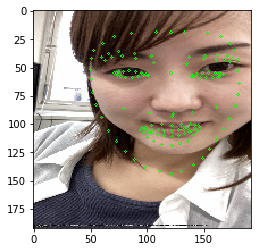

In [12]:
pre_landmark = pre_landmark.reshape(-1, 2)
for (x, y) in pre_landmark.astype(np.int32):
    cv2.circle(img, (x, y), 1, (0, 255, 0))
plt.imshow(img)